# Convolutional network learning

with article: [Worked Example of Convolutional Layers](https://machinelearningmastery.com/convolutional-layers-for-deep-learning-neural-networks/)

In [1]:
!pip install -q keras

In [1]:
import keras

Is GPU working?

In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

Which GPU Am I using?

In [3]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 15197240467755404195
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14385217536
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 3765331874449629172
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

RAM?

In [5]:
!cat /proc/meminfo

MemTotal:       13297200 kB
MemFree:         7582256 kB
MemAvailable:   11398452 kB
Buffers:          338404 kB
Cached:          3654640 kB
SwapCached:            0 kB
Active:           697684 kB
Inactive:        4617068 kB
Active(anon):       1044 kB
Inactive(anon):  1314876 kB
Active(file):     696640 kB
Inactive(file):  3302192 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               728 kB
Writeback:             0 kB
AnonPages:       1321600 kB
Mapped:           743316 kB
Shmem:             11564 kB
KReclaimable:     117628 kB
Slab:             160468 kB
SReclaimable:     117628 kB
SUnreclaim:        42840 kB
KernelStack:        5808 kB
PageTables:        13516 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6648600 kB
Committed_AS:    4320820 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       78288 kB
VmallocChunk:          0 kB
Percpu:          

## Example of 1D Convolutional Layer

In [5]:
from numpy import asarray
from keras.models import Sequential
from keras.layers import Conv1D

In [15]:
# define input data
data = asarray([0, 0, 0, 1, 1, 0, 0, 0])
data = data.reshape(1,8,1) 
# 1st: # of samples
# 2nd: dimension of sample
# 3rd: nb of channels in each sample

In [10]:
data

array([[[0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0]]])

In [11]:
# create model
model = Sequential()
model.add(Conv1D(1, 3, input_shape=(8, 1))) # shape of the filter: kernel_size, here 3

In [12]:
# define a vertical line detector, our handcrafted filter
weights = [asarray([[[0]],[[1]],[[0]]]), asarray([0.0])]
# store the weights in the model
model.set_weights(weights)

In [13]:
# confirm they were stored
print(model.get_weights())

[array([[[0.]],

       [[1.]],

       [[0.]]], dtype=float32), array([0.], dtype=float32)]


This will return the feature map directly: that is the output of applying the filter systematically across the input sequence.

In [14]:
# apply filter to input data
yhat = model.predict(data)
print(yhat)

1/1 [==============================] - 6s 6s/step
[[[0.]
  [0.]
  [1.]
  [1.]
  [0.]
  [0.]]]


## Example of 2D Convolutional Layer

single channel: grayscale

In [16]:
# define input data
data = [[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0]]
data = asarray(data)
data = data.reshape(1, 8, 8, 1)

# about dimensions:
# 1: # samples
# 2: # rows
# 3: # columns
# 4: # of channels

The filter will be two-dimensional and square with the shape 3×3. The layer will expect input samples to have the shape [columns, rows, channels] or [8,8,1].

In [6]:
from keras.layers import Conv2D

In [19]:
# create model
model = Sequential()
model.add(Conv2D(1, (3,3), input_shape=(8, 8, 1)))

In [20]:
# define a vertical line detector
detector = [[[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]]]
weights = [asarray(detector), asarray([0.0])]
# store the weights in the model
model.set_weights(weights)
# confirm they were stored
print(model.get_weights())

[array([[[[0.]],

        [[1.]],

        [[0.]]],


       [[[0.]],

        [[1.]],

        [[0.]]],


       [[[0.]],

        [[1.]],

        [[0.]]]], dtype=float32), array([0.], dtype=float32)]


In [21]:
# apply filter to input data
yhat = model.predict(data)

1/1 [==============================] - 0s 404ms/step


The shape of the feature map output will be four-dimensional with the shape [batch, rows, columns, filters]. We will be performing a single batch and we have a single filter (one filter and one input channel), therefore the output shape is [1, ?, ?, 1]. We can pretty-print the content of the single feature map as follows:

In [22]:
for r in range(yhat.shape[1]):
	# print each column in the row
	print([yhat[0,r,c,0] for c in range(yhat.shape[2])])

[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]


# Pooling examples

## Detecting vertical lines

In [7]:
# define input data
data = [[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0]]
data = asarray(data)
data = data.reshape(1, 8, 8, 1)

Next, we can define a model that expects input samples to have the shape (8, 8, 1) and has a single hidden convolutional layer with a single filter with the shape of 3 pixels by 3 pixels.

A rectified linear activation function, or ReLU for short, is then applied to each value in the feature map. This is a simple and effective nonlinearity, that in this case will not change the values in the feature map, but is present because we will later add subsequent pooling layers and pooling is added after the nonlinearity applied to the feature maps, e.g. a best practice.

In [8]:
# create model
model = Sequential()
model.add(Conv2D(1, (3,3), activation='relu', input_shape=(8, 8, 1)))
# summarize model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 6, 6, 1)           10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [9]:
# define a vertical line detector
detector = [[[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]]]
weights = [asarray(detector), asarray([0.0])]
# store the weights in the model
model.set_weights(weights)

In [10]:
# apply filter to input data
yhat = model.predict(data)

1/1 [==============================] - 7s 7s/step


In [11]:
# enumerate rows
for r in range(yhat.shape[1]):
	# print each column in the row
	print([yhat[0,r,c,0] for c in range(yhat.shape[2])])

[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]


## Average pooling layer

In [12]:
# example of average pooling
from numpy import asarray
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import AveragePooling2D
# define input data
data = [[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0]]
data = asarray(data)
data = data.reshape(1, 8, 8, 1)
# create model
model = Sequential()
model.add(Conv2D(1, (3,3), activation='relu', input_shape=(8, 8, 1)))
model.add(AveragePooling2D())
# summarize model
model.summary()
# define a vertical line detector
detector = [[[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]]]
weights = [asarray(detector), asarray([0.0])]
# store the weights in the model
model.set_weights(weights)
# apply filter to input data
yhat = model.predict(data)
# enumerate rows
for r in range(yhat.shape[1]):
	# print each column in the row
	print([yhat[0,r,c,0] for c in range(yhat.shape[2])])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 6, 6, 1)           10        
                                                                 
 average_pooling2d (AverageP  (None, 3, 3, 1)          0         
 ooling2D)                                                       
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 132ms/step
[0.0, 3.0, 0.0]
[0.0, 3.0, 0.0]
[0.0, 3.0, 0.0]


## Max Pooling layer

In [13]:
# example of max pooling
from numpy import asarray
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
# define input data
data = [[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0]]
data = asarray(data)
data = data.reshape(1, 8, 8, 1)
# create model
model = Sequential()
model.add(Conv2D(1, (3,3), activation='relu', input_shape=(8, 8, 1)))
model.add(MaxPooling2D())
# summarize model
model.summary()
# define a vertical line detector
detector = [[[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]]]
weights = [asarray(detector), asarray([0.0])]
# store the weights in the model
model.set_weights(weights)
# apply filter to input data
yhat = model.predict(data)
# enumerate rows
for r in range(yhat.shape[1]):
	# print each column in the row
	print([yhat[0,r,c,0] for c in range(yhat.shape[2])])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 6, 6, 1)           10        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 1)          0         
 )                                                               
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 51ms/step
[0.0, 3.0, 0.0]
[0.0, 3.0, 0.0]
[0.0, 3.0, 0.0]


# Cours OC classif img.

In [22]:
cd drive/MyDrive/colab-notebooks/OC12_deep_lear

/content/drive/MyDrive/colab-notebooks/OC12_deep_lear


In [25]:
ls

OC12_deep-learn.ipynb  README.md  simba.png


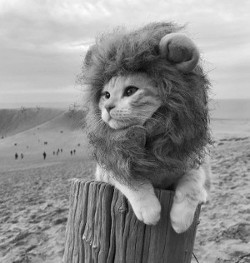

In [33]:
from PIL import Image

# Charger l'image
img = Image.open("simba.png") 

# Afficher l'image chargée
img.show()

In [27]:
# Récupérer et afficher la taille de l'image (en pixels)
w, h = img.size
print("Largeur : {} px, hauteur : {} px".format(w, h))

Largeur : 250 px, hauteur : 263 px


In [28]:
# Afficher son mode de quantification
print("Format des pixels : {}".format(img.mode))

# Récupérer et afficher la valeur du pixel à une position précise
px_value = img.getpixel((20,100))
print("Valeur du pixel situé en (20,100) : {}".format(px_value))

Format des pixels : L
Valeur du pixel situé en (20,100) : 196


In [29]:
import numpy as np

# Récupérer les valeurs de tous les pixels sous forme d'une matrice
mat = np.array(img)
mat

# Afficher la taille de la matrice de pixels
print("Taille de la matrice de pixels : {}".format(mat.shape))

Taille de la matrice de pixels : (263, 250)


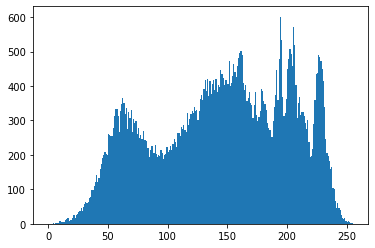

In [31]:
import matplotlib.pyplot as plt

# Générer et afficher l'histogramme
# Pour le normaliser : argument density=True dans plt.hist
# Pour avoir l'histogramme cumulé : argument cumulative=True
n, bins, patches = plt.hist(mat.flatten(), bins=range(256))
plt.show()

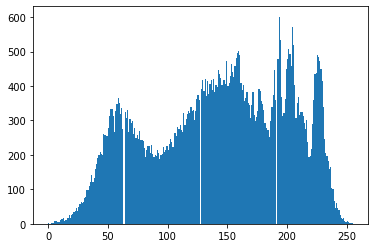

In [37]:
new_mat = np.array(new_contr_img)

n, bins, patches = plt.hist(new_mat.flatten(), bins=range(256))
plt.show()

In [32]:
from PIL.ImageOps import autocontrast

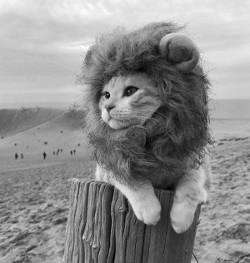

In [35]:
new_contr_img = autocontrast(img)
new_contr_img.show()

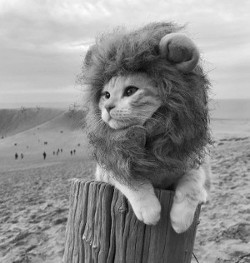

In [36]:
img.show()